In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


In [2]:
import pandas as pd

# Specify the encoding when reading the CSV file
data = pd.read_csv('/content/drive/MyDrive/bangladesh_student/Anxiety2.csv', encoding='latin1')

# Display the first few rows of the DataFrame
data.head()


,1. Age,3. University,4. Department,6. Current CGPA,7. Did you receive a waiver or scholarship at your university?,"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?","2. In a semester, how often have you been unable to stop worrying about your academic affairs?","3. In a semester, how often have you had trouble relaxing due to academic pressure?","4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?","5. In a semester, how often have you worried too much about academic affairs?",...,"7. In a semester, how often have you felt afraid, as if something awful might happen?",Anxiety Level\n0Â4: minimal anxiety\n5Â9: mild anxiety\n10Â14: moderate anxiety\n15Â21: severe anxiety,2. Gender_Female,2. Gender_Male,2. Gender_Prefer not to say,5. Academic Year_First Year or Equivalent,5. Academic Year_Fourth Year or Equivalent,5. Academic Year_Other,5. Academic Year_Second Year or Equivalent,5. Academic Year_Third Year or Equivalent
0,1,8,2,1,0,1,1,1,2,2,...,1,2,True,False,False,False,True,False,False,False
1,1,8,2,4,0,2,2,1,1,1,...,1,1,False,True,False,True,False,False,False,False
2,1,8,2,2,0,2,1,1,0,2,...,2,2,False,True,False,True,False,False,False,False
3,1,8,2,3,0,2,1,1,1,1,...,1,1,False,True,False,True,False,False,False,False
4,1,8,2,3,0,1,1,1,1,1,...,1,1,False,True,False,True,False,False,False,False


In [3]:
import pandas as pd

# Read the CSV file
data = pd.read_csv("/content/drive/MyDrive/bangladesh_student/Anxiety2.csv")

# Drop the 'Abundance' column from the DataFrame to create the feature matrix X
X = data.drop('Anxiety Level\n04: minimal anxiety\n59: mild anxiety\n1014: moderate anxiety\n1521: severe anxiety', axis=1)

# Extract the 'Abundance' column as the target variable y
y = data['Anxiety Level\n04: minimal anxiety\n59: mild anxiety\n1014: moderate anxiety\n1521: severe anxiety']

# Print the feature matrix X and target variable y
print(X)
print(y)


      1. Age  3. University  4. Department  6. Current CGPA  \
0          1              8              2                1   
1          1              8              2                4   
2          1              8              2                2   
3          1              8              2                3   
4          1              8              2                3   
...      ...            ...            ...              ...   
1972       2              2              0                3   
1973       2              2             10                3   
1974       2              2              0                4   
1975       2              2             10                2   
1976       2              8              2                1   

      7. Did you receive a waiver or scholarship at your university?  \
0                                                     0                
1                                                     0                
2                          

In [4]:
from sklearn.model_selection import train_test_split
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train, y_train)


GaussianNB()

Cross-Validation Scores: [0.85858586 0.75252525 0.84556962 0.89620253 0.84810127]
Mean Cross-Validation Score: 0.8401969057665261


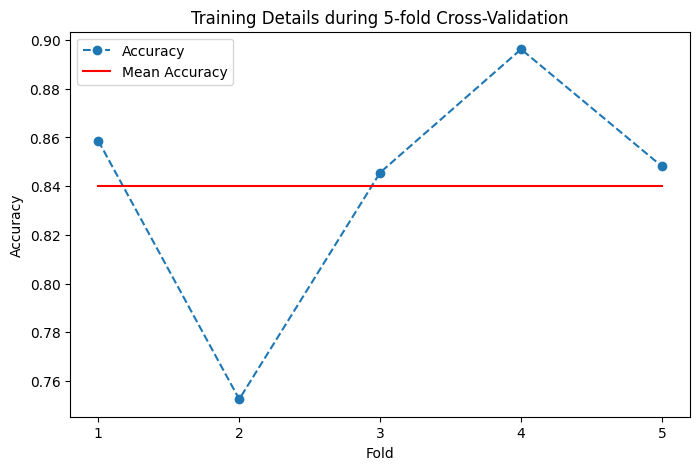

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score

# Model training with 5-fold cross-validation
nb_classifier = GaussianNB()
cv_scores = cross_val_score(nb_classifier, X, y, cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(nb_classifier, X, y, cv=5)

# Calculate mean cross-validation score
mean_cv_score = np.mean(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)

# Plot training details
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_cv_score] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation')
plt.legend()
plt.show()


Best Parameters: {'var_smoothing': 0.03511191734215131}
Accuracy: 0.9393939393939394
Precision: 0.9412868314919968
Recall: 0.9393939393939394
F1-score: 0.9392697545096036
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        25
           1       0.90      0.99      0.94        99
           2       0.93      0.91      0.92       122
           3       0.97      0.95      0.96       150

    accuracy                           0.94       396
   macro avg       0.95      0.92      0.93       396
weighted avg       0.94      0.94      0.94       396



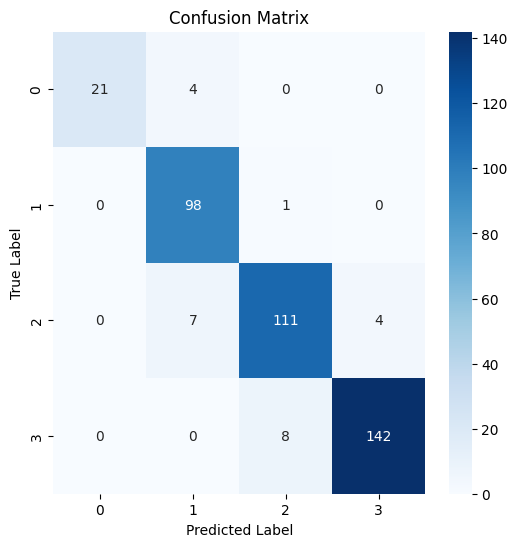

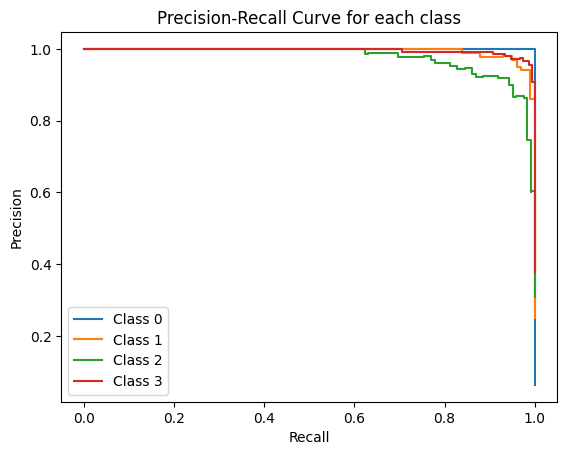

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Naive Bayes classifier
nb_classifier = GaussianNB()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best estimator
best_nb_classifier = grid_search.best_estimator_

# Model testing and evaluation
y_pred_probs = best_nb_classifier.predict_proba(X_test)  # Calculate predicted probabilities

# Model predictions
y_pred = best_nb_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Precision-Recall Curve for each class (One-vs-All)
num_classes = len(set(y_test))
for class_index in range(num_classes):
    precision, recall, _ = precision_recall_curve(
        (y_test == class_index).astype(int),
        y_pred_probs[:, class_index]
    )
    plt.step(recall, precision, where='post', label=f'Class {class_index}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend()
plt.show()


In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Cross-Validation Scores: [0.85858586 0.87121212 0.84810127 0.87088608 0.84810127]
Mean Cross-Validation Score: 0.8593773174785833


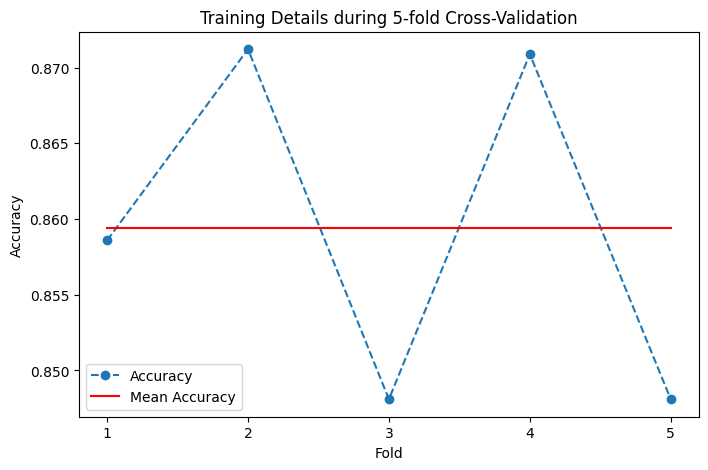

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score

# Model training with 5-fold cross-validation
dt_classifier = DecisionTreeClassifier(random_state=42)
cv_scores = cross_val_score(dt_classifier, X, y, cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(dt_classifier, X, y, cv=5)

# Calculate mean cross-validation score
mean_cv_score = np.mean(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)

# Plot training details
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_cv_score] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation')
plt.legend()
plt.show()


Accuracy: 0.8611111111111112
Precision: 0.8632436890123648
Recall: 0.8611111111111112
F1-score: 0.8607377549504854
Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        25
           1       0.90      0.80      0.84        99
           2       0.79      0.81      0.80       122
           3       0.91      0.92      0.91       150

    accuracy                           0.86       396
   macro avg       0.85      0.88      0.86       396
weighted avg       0.86      0.86      0.86       396



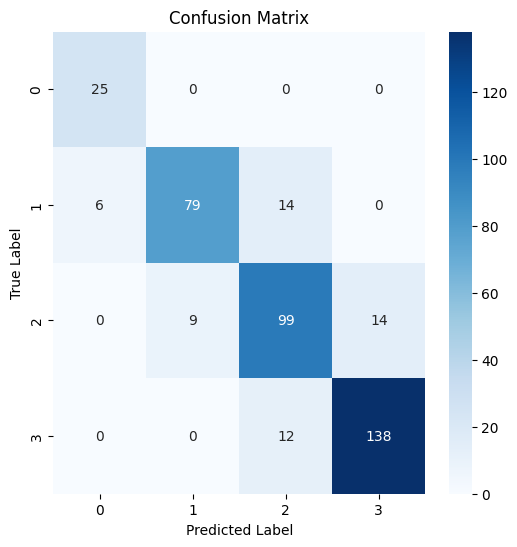

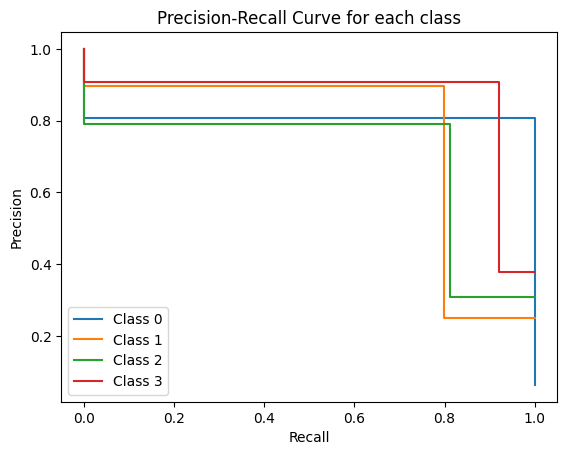

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train (fit) the DecisionTreeClassifier model
dt_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred_probs = dt_classifier.predict_proba(X_test)  # Calculate predicted probabilities

# Model predictions
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Precision-Recall Curve for each class (One-vs-All)
num_classes = len(set(y_test))
for class_index in range(num_classes):
    precision, recall, _ = precision_recall_curve(
        (y_test == class_index).astype(int),
        y_pred_probs[:, class_index]
    )
    plt.step(recall, precision, where='post', label=f'Class {class_index}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend()
plt.show()
